In [1]:
import h5py
import numpy as np
import corner
import matplotlib.pyplot as plt

In [2]:
folder = 'C:/Users/oryan/Documents/Session_Results/2022-05-27-test-results/h5_files/'

In [3]:
file = 'UGC10650_Full.h5'

In [4]:
filepath = folder + file

In [5]:
data = {}

In [6]:
with h5py.File(filepath, 'r') as f:
    print('Keys: %s' % f.keys())
    a_group_key = list(f.keys())[0]
    sub_keys = list(f[a_group_key])
    
    for key in sub_keys:
            print(f[a_group_key][key])
            data[key] = f[a_group_key][key].value

Keys: <KeysViewHDF5 ['mcmc']>
<HDF5 dataset "accepted": shape (80,), type "<f8">
<HDF5 dataset "chain": shape (10000, 80, 13), type "<f8">
<HDF5 dataset "log_prob": shape (10000, 80), type "<f8">


C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [7]:
data['log_prob'].shape

(10000, 80)

In [9]:
reshaped_data = data['chain'][:,:,:].reshape([(10000)*80,13])

In [10]:
test = reshaped_data.copy()
for i in range(4):
    for j in range(reshaped_data.shape[0]):
        if test[j,8+i] > 180:
            test[j,8+i] -= 180 

In [12]:
steps_done = 10000

In [13]:
test = reshaped_data
done_steps = []
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        if test[i,j] == 0:
            continue
        elif test[i,j] != 0 and j == test.shape[1] - 1:
            done_steps.append(test[i,:])
done_steps_arr = np.asarray(done_steps)
done_steps_arr.shape

(800000, 13)

In [27]:
ranges = [[-10,10],[-20,20],[-20,20],[-20,20],[0.01,20],[0.01,20],[0.1,20],[0.1,20],[0,360],[0,360],[0,360],[0,360], [9,12], [9,12]]

In [15]:
np.log10(np.max(done_steps_arr[:,0]*1e12))

12.395497388832615

In [16]:
ranges[4:6]

[[0.01, 5], [0.01, 5]]

In [17]:
(done_steps_arr[:,0], done_steps_arr[:,-1])

(array([-0.15320421, -1.07598252,  2.09036255, ..., -1.99683558,
        -0.84149779,  1.05245442]),
 array([-5.49677689, -5.06383049, -5.98415345, ..., -5.97160897,
        -5.77707999, -4.86103218]))

In [18]:
tmp = np.zeros([done_steps_arr.shape[0],2])
tmp[:,0] = done_steps_arr[:,0]
tmp[:,1] = done_steps_arr[:,-1]

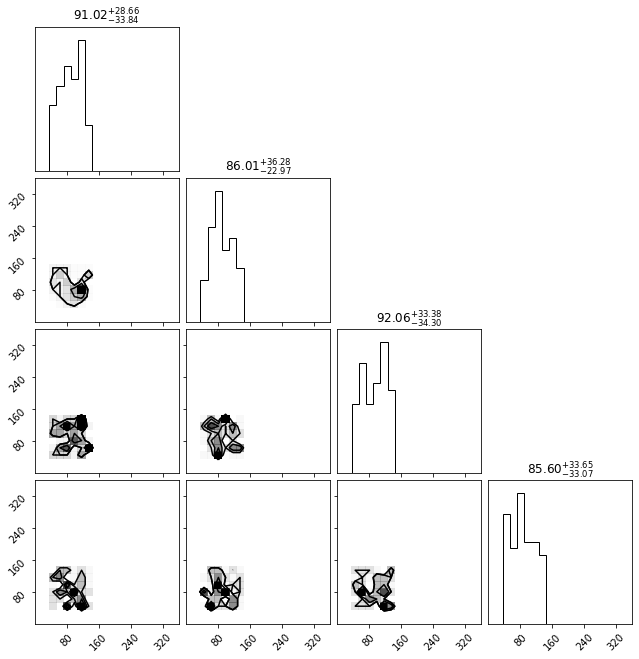

In [29]:
fig = corner.corner(done_steps_arr[:,8:12], show_titles=True,plot_datapoints=False,range = ranges[8:12])

In [152]:
plt.figure(figsize = (16,12))
plt.scatter(np.linspace(0,7500,7500),data['log_prob'][:])
plt.ylim([-5,0])

IndexError: index 3261 is out of bounds for axis 1 with size 80

<Figure size 1152x864 with 0 Axes>

In [154]:
data['log_prob'].shape

(7500, 80)

In [135]:
data['chain'].shape

(7500, 80, 15)

In [147]:
np.where(data['log_prob'] == np.max(data['log_prob']))

(array([3261, 3262, 3263, 3264, 3265, 3266], dtype=int64),
 array([1, 1, 1, 1, 1, 1], dtype=int64))

In [151]:
data['chain'][3263, -1, :]

array([  0.88104744,   7.8528054 ,   1.40741397,   6.28881789,
         9.71228245,   8.2552492 ,   0.22178031,   1.58118638,
         0.18833612,   0.50086874,  95.09704068, 125.02278204,
       167.50138702, 115.79990676,  -6.08125287])